# Extracting zip folder

In [ ]:
!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/15029936576_8d6f96c72c_n.jpg  
  inflating: flowers/daisy/15100730728_a450c5f422_n.jpg  
  inflating: flowers/daisy/15306268004_4680ba95e1.jpg  
  inflating: flowers/daisy/15327813273_06cdf42210.jpg  
  inflating: flowers/daisy/15760153042_a2a90e9da5_m.jpg  
  inflating: flowers/daisy/15760811380_4d686c892b_n.jpg  
  inflating: flowers/daisy/15784493690_b1858cdb2b_n.jpg  
  inflating: flowers/daisy/15813862117_dedcd1c56f_m.jpg  
  inflating: flowers/daisy/15853110333_229c439e7f.jpg  
  inflating: flowers/daisy/16020253176_60f2a6a5ca_n.jpg  
  inflating: flowers/daisy/16025261368_911703a536_n.jpg  
  inflating: flowers/daisy/16056178001_bebc2153fe_n.jpg  
  inflating: flowers/daisy/16121105382_b96251e506_m.jpg  
  inflating: flowers/daisy/16161045294_70c76ce846_n.jpg  
  inflating: flowers/daisy/16291797949_a1b1b7c2bd_n.jpg  
  inflating: flowers/daisy/16323838000_3818bce5c6_n.jpg  
  inflating: flowers/daisy/16360180712_

# Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
flowers_datagram = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [8]:
flowers_datagram = ImageDataGenerator(rescale=1./255)

In [10]:
xflowers = flowers_datagram.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 936 images belonging to 5 classes.


# Create Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# Add Layers

In [14]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer

# Compile The Model

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit The Model

In [16]:
model.fit_generator(xflowers,
                    steps_per_epoch=len(xflowers),
                    epochs=20,
                    validation_data=xflowers,
                    validation_steps=len(xflowers),)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
10/10 [==============================] - 17s 579ms/step - loss: 2.5032 - accuracy: 0.2575 - val_loss: 1.8004 - val_accuracy: 0.2553
Epoch 2/20
10/10 [==============================] - 5s 550ms/step - loss: 1.4214 - accuracy: 0.3910 - val_loss: 1.2839 - val_accuracy: 0.4626
Epoch 3/20
10/10 [==============================] - 5s 555ms/step - loss: 1.2371 - accuracy: 0.4637 - val_loss: 1.1766 - val_accuracy: 0.5267
Epoch 4/20
10/10 [==============================] - 5s 556ms/step - loss: 1.1329 - accuracy: 0.5288 - val_loss: 1.0581 - val_accuracy: 0.5694
Epoch 5/20
10/10 [==============================] - 5s 558ms/step - loss: 1.0547 - accuracy: 0.5630 - val_loss: 1.0130 - val_accuracy: 0.5833
Epoch 6/20
10/10 [==============================] - 5s 562ms/step - loss: 0.9972 - accuracy: 0.5908 - val_loss: 0.9217 - val_accuracy: 0.6303
Epoch 7/20
10/10 [==============================] - 5s 558ms/step - loss: 0.9275 - accuracy: 0.6335 - val_loss: 0.8713 - val_accuracy: 0.6453
Epoch

# Save Model

In [18]:
model.save('flowers.h5')

# Testing Model

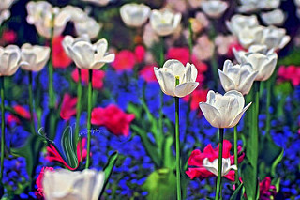

In [40]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/tulip/19413898445_69344f9956_n.jpg',target_size=(200,300))
img

In [25]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/daisy/15813862117_dedcd1c56f_m.jpg',target_size=(60,60))
x = image.img_to_array(img)
x

array([[[220., 222., 219.],
        [219., 221., 218.],
        [220., 222., 219.],
        ...,
        [212., 213., 208.],
        [212., 213., 208.],
        [210., 213., 206.]],

       [[219., 221., 218.],
        [220., 222., 219.],
        [219., 221., 218.],
        ...,
        [212., 213., 208.],
        [211., 212., 207.],
        [210., 212., 207.]],

       [[220., 222., 219.],
        [220., 222., 219.],
        [220., 222., 219.],
        ...,
        [212., 213., 207.],
        [212., 213., 207.],
        [211., 212., 206.]],

       ...,

       [[134.,  97.,  70.],
        [135.,  98.,  71.],
        [133.,  96.,  69.],
        ...,
        [131.,  91.,  65.],
        [131.,  89.,  64.],
        [130.,  90.,  64.]],

       [[141., 104.,  77.],
        [142., 105.,  78.],
        [143., 106.,  79.],
        ...,
        [135.,  95.,  69.],
        [135.,  95.,  69.],
        [132.,  92.,  66.]],

       [[141., 104.,  77.],
        [140., 103.,  76.],
        [137., 1

In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/flowers/tulip/19413898445_69344f9956_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
model.predict(x)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [43]:
# Testing 2

xflowers.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [42]:
# Testing 3

img = image.load_img('/content/flowers/tulip/19413898445_69344f9956_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(pred)
print(op[pred])

4
tulip
